In [30]:
import scipy
import numpy as np
import pandas as pd

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.impute import KNNImputer
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PowerTransformer, StandardScaler

In [3]:
data = pd.read_csv('C:/Users/hp/Documents/kaam/Thesis projects/Hospital deaths prediction/archive/Dataset.csv')
target = data['hospital_death']

In [4]:
data

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


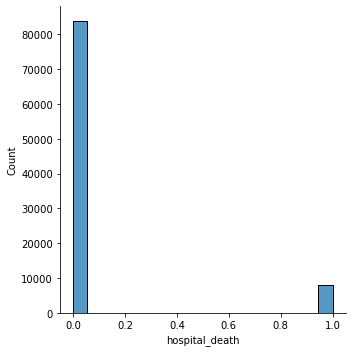

In [12]:
sns.displot(target)

In [6]:
data.isnull().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64

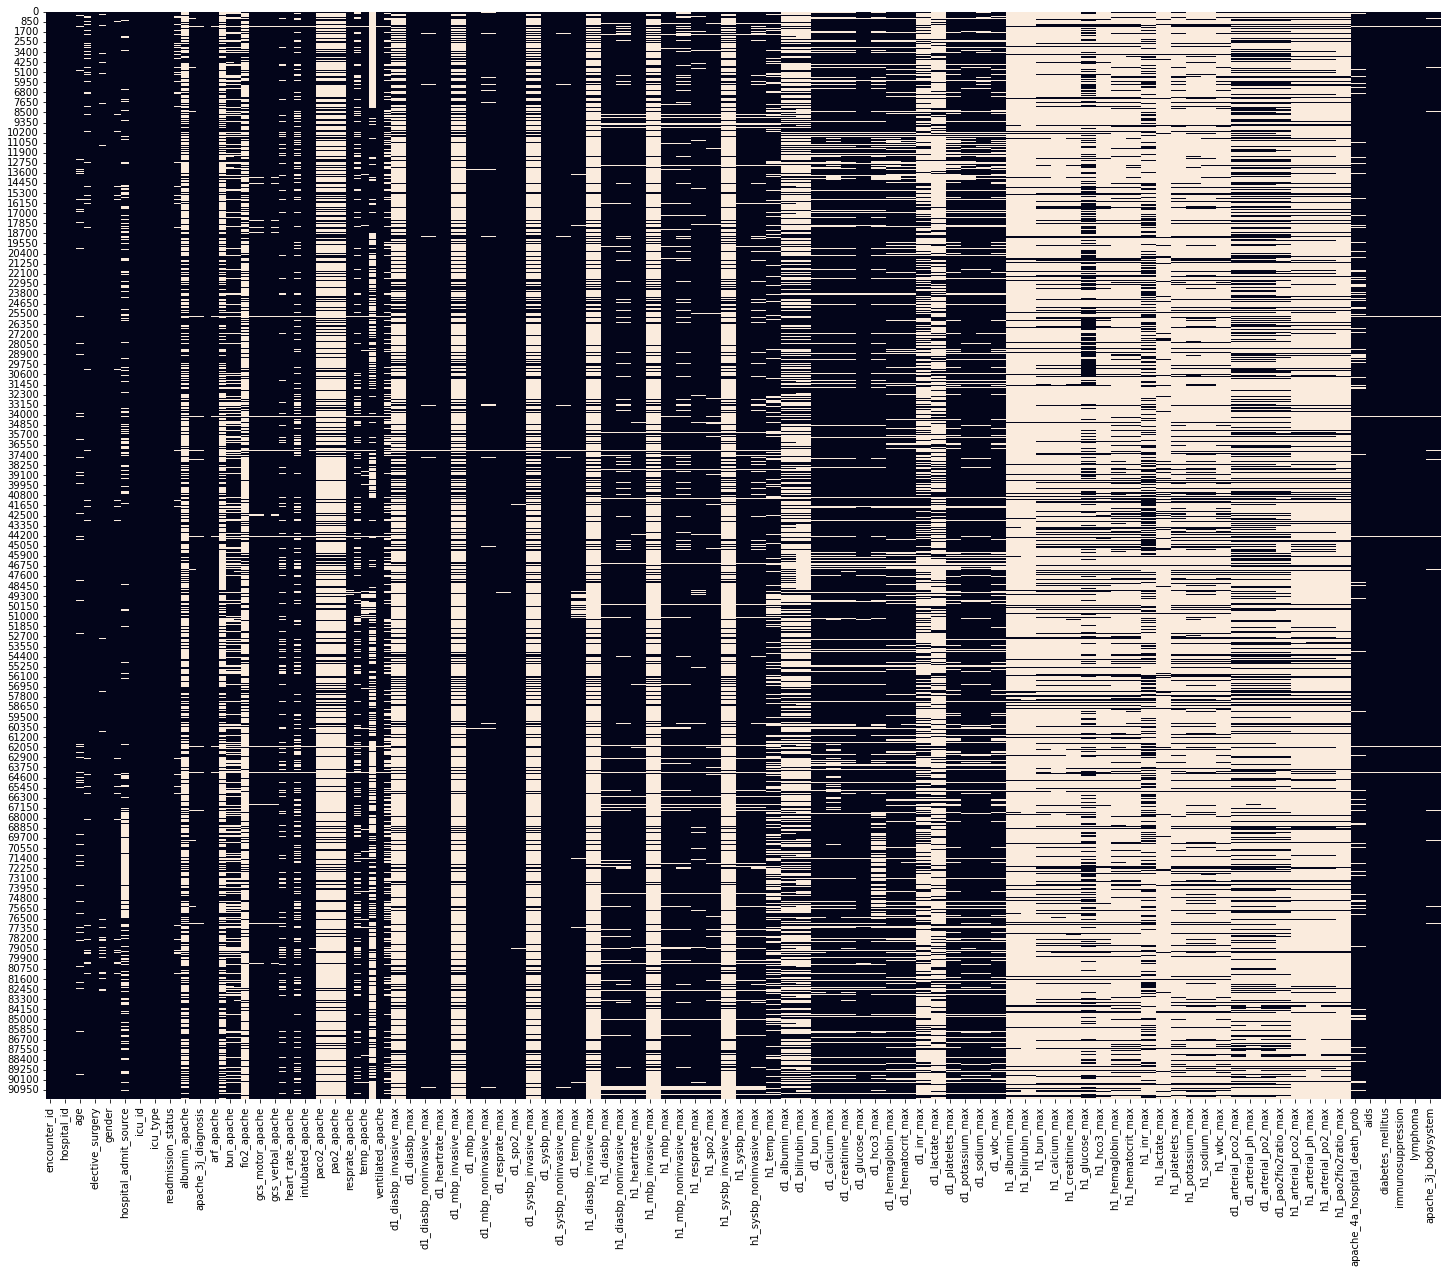

In [10]:
plt.figure(figsize = (25,20))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [13]:
#data = pd.get_dummies(data)
data

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [14]:
data.isnull().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64

In [15]:
data.isnull().mean() * 100

encounter_id                   0.000000
patient_id                     0.000000
hospital_id                    0.000000
hospital_death                 0.000000
age                            4.610033
                                 ...   
leukemia                       0.779606
lymphoma                       0.779606
solid_tumor_with_metastasis    0.779606
apache_3j_bodysystem           1.812175
apache_2_bodysystem            1.812175
Length: 186, dtype: float64

In [16]:
#knn = KNNImputer()

train_num = data.select_dtypes(np.number)
train_num
train_num_miss = train_num.isna().columns
#train_num_transformed = knn.fit_transform(train_num)
#train_num = pd.DataFrame(train_num_transformed, columns=train_num.columns, index=data.index)
#for i in train_num.columns:
 #   train_num.fillna(i.mean())


In [17]:
train_num_miss

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days',
       ...
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids',
       'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis'],
      dtype='object', length=178)

In [18]:

for i in train_num.columns:
 train_num[i].fillna(train_num[i].mean(), inplace=True)
print(train_num)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


       encounter_id  patient_id  hospital_id  hospital_death        age  \
0             66154       25312          118               0  68.000000   
1            114252       59342           81               0  77.000000   
2            119783       50777          118               0  25.000000   
3             79267       46918          118               0  81.000000   
4             92056       34377           33               0  19.000000   
...             ...         ...          ...             ...        ...   
91708         91592       78108           30               0  75.000000   
91709         66119       13486          121               0  56.000000   
91710          8981       58179          195               0  48.000000   
91711         33776      120598           66               0  62.309516   
91712          1671       53612          104               0  82.000000   

             bmi  elective_surgery  height  icu_id  pre_icu_los_days  ...  \
0      22.730000      

In [19]:
train_num.isna().sum()

encounter_id                   0
patient_id                     0
hospital_id                    0
hospital_death                 0
age                            0
                              ..
hepatic_failure                0
immunosuppression              0
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
Length: 178, dtype: int64

In [20]:
train_obj = data.select_dtypes('object')
train_obj

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,Floor,Floor,admit,CTICU,Sepsis,Cardiovascular
1,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
3,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
4,Caucasian,M,NaN,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma
...,...,...,...,...,...,...,...,...
91708,Caucasian,M,Acute Care/Floor,Floor,admit,Cardiac ICU,Sepsis,Cardiovascular
91709,Caucasian,F,Emergency Department,Floor,admit,Med-Surg ICU,Sepsis,Cardiovascular
91710,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
91711,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Respiratory,Respiratory


In [21]:
for i in train_obj.columns:
 train_obj[i].fillna(train_obj[i].mode()[0], inplace=True)
print(train_obj)

       ethnicity gender hospital_admit_source           icu_admit_source  \
0      Caucasian      M                 Floor                      Floor   
1      Caucasian      F                 Floor                      Floor   
2      Caucasian      F  Emergency Department       Accident & Emergency   
3      Caucasian      F        Operating Room  Operating Room / Recovery   
4      Caucasian      M  Emergency Department       Accident & Emergency   
...          ...    ...                   ...                        ...   
91708  Caucasian      M      Acute Care/Floor                      Floor   
91709  Caucasian      F  Emergency Department                      Floor   
91710  Caucasian      M  Emergency Department       Accident & Emergency   
91711  Caucasian      F  Emergency Department       Accident & Emergency   
91712  Caucasian      F  Emergency Department  Operating Room / Recovery   

      icu_stay_type      icu_type apache_3j_bodysystem apache_2_bodysystem  
0         

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [22]:
train_obj.isna().sum()

ethnicity                0
gender                   0
hospital_admit_source    0
icu_admit_source         0
icu_stay_type            0
icu_type                 0
apache_3j_bodysystem     0
apache_2_bodysystem      0
dtype: int64

In [23]:
data = pd.concat([train_num, train_obj], axis = 1)
data

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,lymphoma,solid_tumor_with_metastasis,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.000000,22.730000,0,180.3,92,0.541667,...,0.0,0.0,Caucasian,M,Floor,Floor,admit,CTICU,Sepsis,Cardiovascular
1,114252,59342,81,0,77.000000,27.420000,0,160.0,90,0.927778,...,0.0,0.0,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,119783,50777,118,0,25.000000,31.950000,0,172.7,93,0.000694,...,0.0,0.0,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
3,79267,46918,118,0,81.000000,22.640000,1,165.1,92,0.000694,...,0.0,0.0,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.000000,29.185818,0,188.0,91,0.073611,...,0.0,0.0,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.000000,23.060250,0,177.8,927,0.298611,...,0.0,1.0,Caucasian,M,Acute Care/Floor,Floor,admit,Cardiac ICU,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.000000,47.179671,0,183.0,925,0.120139,...,0.0,0.0,Caucasian,F,Emergency Department,Floor,admit,Med-Surg ICU,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.000000,27.236914,0,170.2,908,0.046528,...,0.0,0.0,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
91711,33776,120598,66,0,62.309516,23.297481,0,154.9,922,0.081944,...,0.0,0.0,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Respiratory,Respiratory


In [24]:
data = pd.get_dummies(data)
data

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,66154,25312,118,0,68.000000,22.730000,0,180.3,92,0.541667,...,1,0,0,0,0,0,0,0,0,0
1,114252,59342,81,0,77.000000,27.420000,0,160.0,90,0.927778,...,0,0,0,0,0,0,1,0,0,0
2,119783,50777,118,0,25.000000,31.950000,0,172.7,93,0.000694,...,0,0,0,1,0,0,0,0,0,0
3,79267,46918,118,0,81.000000,22.640000,1,165.1,92,0.000694,...,1,0,0,0,0,0,0,0,0,0
4,92056,34377,33,0,19.000000,29.185818,0,188.0,91,0.073611,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.000000,23.060250,0,177.8,927,0.298611,...,1,0,0,0,0,0,0,0,0,0
91709,66119,13486,121,0,56.000000,47.179671,0,183.0,925,0.120139,...,1,0,0,0,0,0,0,0,0,0
91710,8981,58179,195,0,48.000000,27.236914,0,170.2,908,0.046528,...,0,0,0,1,0,0,0,0,0,0
91711,33776,120598,66,0,62.309516,23.297481,0,154.9,922,0.081944,...,0,0,0,0,0,0,1,0,0,0


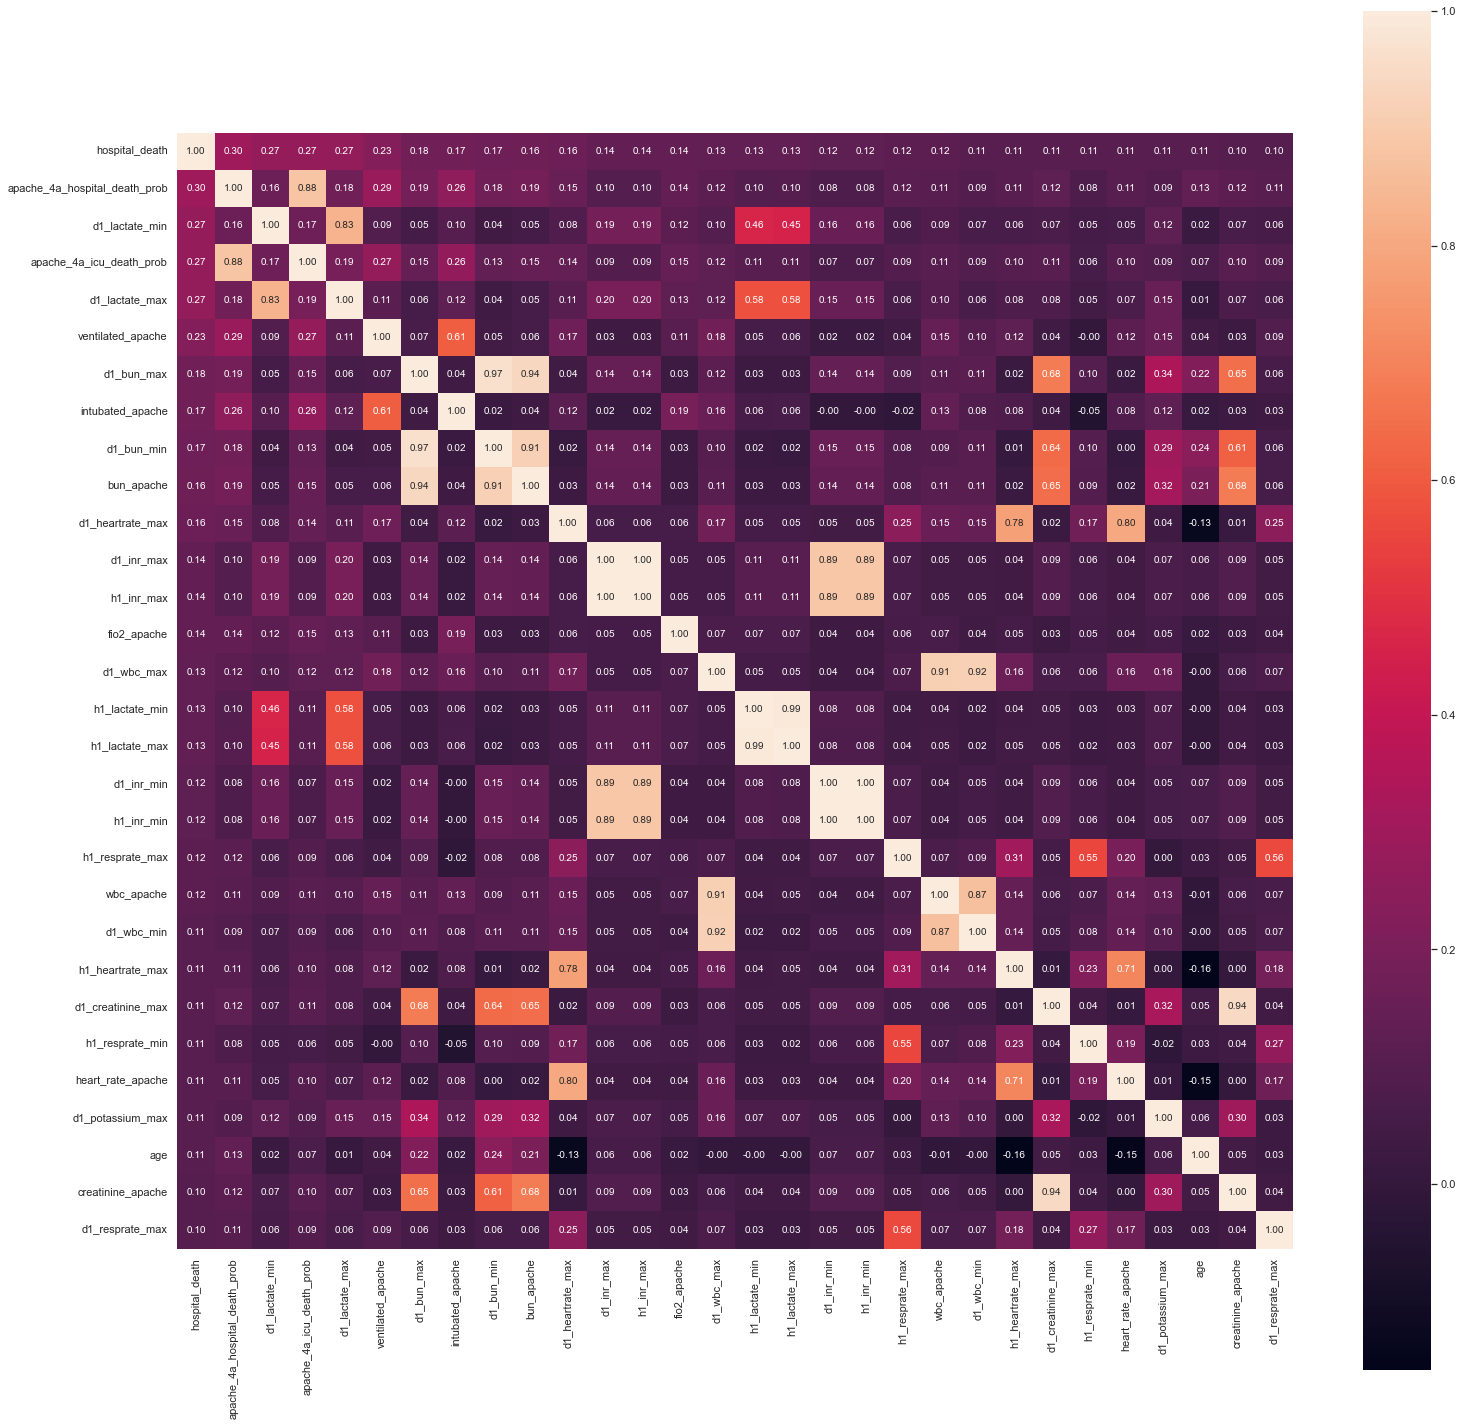

In [25]:
corrmat = data.corr()
k = 30 #number of variables for heatmap
cols = corrmat.nlargest(k, 'hospital_death')['hospital_death'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
sns.set(rc = {'figure.figsize':(25,25)})
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [121]:
#data = data[cols]

In [26]:
X = data.loc[:,data.columns != 'hospital_death']
X

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,66154,25312,118,68.000000,22.730000,0,180.3,92,0.541667,0,...,1,0,0,0,0,0,0,0,0,0
1,114252,59342,81,77.000000,27.420000,0,160.0,90,0.927778,0,...,0,0,0,0,0,0,1,0,0,0
2,119783,50777,118,25.000000,31.950000,0,172.7,93,0.000694,0,...,0,0,0,1,0,0,0,0,0,0
3,79267,46918,118,81.000000,22.640000,1,165.1,92,0.000694,0,...,1,0,0,0,0,0,0,0,0,0
4,92056,34377,33,19.000000,29.185818,0,188.0,91,0.073611,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.000000,23.060250,0,177.8,927,0.298611,0,...,1,0,0,0,0,0,0,0,0,0
91709,66119,13486,121,56.000000,47.179671,0,183.0,925,0.120139,0,...,1,0,0,0,0,0,0,0,0,0
91710,8981,58179,195,48.000000,27.236914,0,170.2,908,0.046528,0,...,0,0,0,1,0,0,0,0,0,0
91711,33776,120598,66,62.309516,23.297481,0,154.9,922,0.081944,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
y = data['hospital_death']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)

In [31]:
smote = SMOTE(random_state = 14)
X_train, y_train = smote.fit_resample(X_train, y_train)

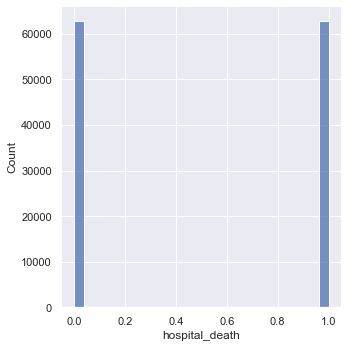

In [32]:
sns.displot(y_train)

In [33]:
tuned_parameters = {'alpha': [10 ** a for a in range(-6, -2)]}
clf = GridSearchCV(SGDClassifier(loss='hinge', penalty='elasticnet',l1_ratio=0.15, max_iter=5, shuffle=True, verbose=False, n_jobs=10, average=False, class_weight='balanced')
                  , tuned_parameters, cv=10, scoring='f1_macro')

clf.fit(X_train, y_train)
#to find the best alpha
print(clf.best_params_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


{'alpha': 0.0001}


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [34]:
for i in range(0, clf.best_estimator_.coef_.shape[0]):
    top20 = np.argsort(clf.best_estimator_.coef_[i])[-20:]
top20

array([  6, 143,  33, 132, 117, 102,  31, 131,   3,  72,   7,  17,  96,
        71,  95, 155,  25,  45,  24, 101], dtype=int64)

In [35]:
j = 0
features_imp = []
for i in top20:
    features_imp.append(X_train.columns[i])

In [36]:
features_imp

['height',
 'h1_platelets_max',
 'resprate_apache',
 'h1_glucose_min',
 'd1_sodium_max',
 'd1_glucose_min',
 'pao2_apache',
 'h1_glucose_max',
 'age',
 'h1_heartrate_min',
 'icu_id',
 'bun_apache',
 'd1_bun_min',
 'h1_heartrate_max',
 'd1_bun_max',
 'd1_arterial_po2_max',
 'heart_rate_apache',
 'd1_heartrate_max',
 'glucose_apache',
 'd1_glucose_max']

In [37]:
pipeline = Pipeline([('scalar', StandardScaler()), ('model', Lasso())])

In [38]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [39]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.250 total time=   1.8s
[CV 2/5] END .................model__alpha=0.1;, score=-0.248 total time=   1.7s
[CV 3/5] END .................model__alpha=0.1;, score=-0.193 total time=   1.7s
[CV 4/5] END .................model__alpha=0.1;, score=-0.292 total time=   1.6s
[CV 5/5] END .................model__alpha=0.1;, score=-0.294 total time=   1.5s
[CV 1/5] END .................model__alpha=0.2;, score=-0.344 total time=   1.2s
[CV 2/5] END .................model__alpha=0.2;, score=-0.342 total time=   1.5s
[CV 3/5] END .................model__alpha=0.2;, score=-0.260 total time=   1.2s
[CV 4/5] END .................model__alpha=0.2;, score=-0.383 total time=   1.3s
[CV 5/5] END .................model__alpha=0.2;, score=-0.382 total time=   1.3s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.347 total time=   1.7s
[CV 2/5] END .model__alpha=0.30000000000000004;

[CV 2/5] END .................model__alpha=2.1;, score=-0.345 total time=   1.0s
[CV 3/5] END .................model__alpha=2.1;, score=-0.267 total time=   1.1s
[CV 4/5] END .................model__alpha=2.1;, score=-0.391 total time=   1.1s
[CV 5/5] END .................model__alpha=2.1;, score=-0.391 total time=   1.1s
[CV 1/5] END .................model__alpha=2.2;, score=-0.347 total time=   1.1s
[CV 2/5] END .................model__alpha=2.2;, score=-0.345 total time=   1.1s
[CV 3/5] END .................model__alpha=2.2;, score=-0.267 total time=   1.1s
[CV 4/5] END .................model__alpha=2.2;, score=-0.391 total time=   1.1s
[CV 5/5] END .................model__alpha=2.2;, score=-0.391 total time=   1.1s
[CV 1/5] END ..model__alpha=2.3000000000000003;, score=-0.347 total time=   1.1s
[CV 2/5] END ..model__alpha=2.3000000000000003;, score=-0.345 total time=   1.1s
[CV 3/5] END ..model__alpha=2.3000000000000003;, score=-0.267 total time=   1.1s
[CV 4/5] END ..model__alpha=

[CV 4/5] END .................model__alpha=4.1;, score=-0.391 total time=   1.1s
[CV 5/5] END .................model__alpha=4.1;, score=-0.391 total time=   1.1s
[CV 1/5] END .................model__alpha=4.2;, score=-0.347 total time=   1.3s
[CV 2/5] END .................model__alpha=4.2;, score=-0.345 total time=   1.7s
[CV 3/5] END .................model__alpha=4.2;, score=-0.267 total time=   1.6s
[CV 4/5] END .................model__alpha=4.2;, score=-0.391 total time=   1.3s
[CV 5/5] END .................model__alpha=4.2;, score=-0.391 total time=   1.6s
[CV 1/5] END .................model__alpha=4.3;, score=-0.347 total time=   1.6s
[CV 2/5] END .................model__alpha=4.3;, score=-0.345 total time=   1.2s
[CV 3/5] END .................model__alpha=4.3;, score=-0.267 total time=   1.5s
[CV 4/5] END .................model__alpha=4.3;, score=-0.391 total time=   1.2s
[CV 5/5] END .................model__alpha=4.3;, score=-0.391 total time=   1.3s
[CV 1/5] END ..model__alpha=

[CV 1/5] END .................model__alpha=6.2;, score=-0.347 total time=   1.5s
[CV 2/5] END .................model__alpha=6.2;, score=-0.345 total time=   1.7s
[CV 3/5] END .................model__alpha=6.2;, score=-0.267 total time=   1.7s
[CV 4/5] END .................model__alpha=6.2;, score=-0.391 total time=   1.2s
[CV 5/5] END .................model__alpha=6.2;, score=-0.391 total time=   1.7s
[CV 1/5] END .................model__alpha=6.3;, score=-0.347 total time=   1.4s
[CV 2/5] END .................model__alpha=6.3;, score=-0.345 total time=   1.6s
[CV 3/5] END .................model__alpha=6.3;, score=-0.267 total time=   1.5s
[CV 4/5] END .................model__alpha=6.3;, score=-0.391 total time=   1.3s
[CV 5/5] END .................model__alpha=6.3;, score=-0.391 total time=   1.2s
[CV 1/5] END .................model__alpha=6.4;, score=-0.347 total time=   1.2s
[CV 2/5] END .................model__alpha=6.4;, score=-0.345 total time=   1.2s
[CV 3/5] END ...............

[CV 3/5] END .................model__alpha=8.2;, score=-0.267 total time=   1.5s
[CV 4/5] END .................model__alpha=8.2;, score=-0.391 total time=   1.2s
[CV 5/5] END .................model__alpha=8.2;, score=-0.391 total time=   1.2s
[CV 1/5] END .................model__alpha=8.3;, score=-0.347 total time=   1.3s
[CV 2/5] END .................model__alpha=8.3;, score=-0.345 total time=   1.2s
[CV 3/5] END .................model__alpha=8.3;, score=-0.267 total time=   1.1s
[CV 4/5] END .................model__alpha=8.3;, score=-0.391 total time=   1.1s
[CV 5/5] END .................model__alpha=8.3;, score=-0.391 total time=   1.1s
[CV 1/5] END .................model__alpha=8.4;, score=-0.347 total time=   1.1s
[CV 2/5] END .................model__alpha=8.4;, score=-0.345 total time=   1.1s
[CV 3/5] END .................model__alpha=8.4;, score=-0.267 total time=   1.3s
[CV 4/5] END .................model__alpha=8.4;, score=-0.391 total time=   1.1s
[CV 5/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [40]:
#search.best_params_

In [41]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [42]:
importance = np.abs(coefficients)
importance

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00245588,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00313585, 0.01317403, 0.        , 0.01011654, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05065446, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00267193, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00091588, 0.        , 0.        , 0.        ,
       0.03426606, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [43]:
features = np.array(X.columns)
features[importance > 0]

array(['apache_post_operative', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_verbal_apache', 'ventilated_apache', 'd1_mbp_min',
       'd1_spo2_min', 'd1_sysbp_min', 'd1_bun_max',
       'apache_4a_hospital_death_prob',
       'icu_admit_source_Accident & Emergency',
       'icu_admit_source_Operating Room / Recovery',
       'apache_3j_bodysystem_Cardiovascular'], dtype=object)